In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

(array([ 3.,  1.,  7.,  7.,  3.,  6.,  8., 10.,  8., 23., 15., 19., 14.,
        16., 18., 28., 36., 29., 33., 28., 37., 21., 15.,  4.,  7., 11.,
         9.,  9.,  5.,  7.,  7.,  8.,  2.,  8.,  5.,  4.,  2.,  1.,  1.,
         0.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  0.,  3., 16.]),
 array([ 5. ,  5.9,  6.8,  7.7,  8.6,  9.5, 10.4, 11.3, 12.2, 13.1, 14. ,
        14.9, 15.8, 16.7, 17.6, 18.5, 19.4, 20.3, 21.2, 22.1, 23. , 23.9,
        24.8, 25.7, 26.6, 27.5, 28.4, 29.3, 30.2, 31.1, 32. , 32.9, 33.8,
        34.7, 35.6, 36.5, 37.4, 38.3, 39.2, 40.1, 41. , 41.9, 42.8, 43.7,
        44.6, 45.5, 46.4, 47.3, 48.2, 49.1, 50. ]),
 <BarContainer object of 50 artists>)

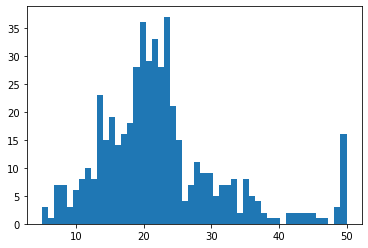

In [3]:
plt.hist(boston.target, bins=50)

Text(0.5, 0, 'Number of rooms')

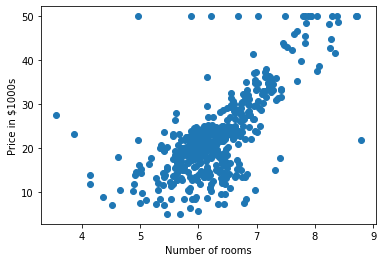

In [4]:
plt.scatter(boston.data[:,5],boston.target)

plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

In [5]:
boston_df = pd.DataFrame(boston.data)

boston_df.columns = boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
boston_df['Price'] = boston.target

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


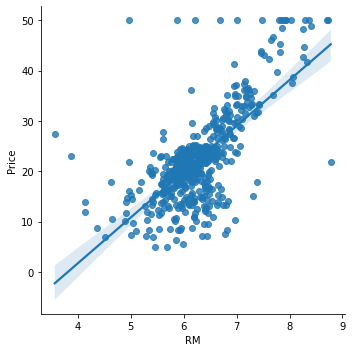

In [7]:
sns.lmplot(x='RM', y='Price', data=boston_df)

In [8]:
#Set independent variabel

X = np.array([boston_df.RM], dtype='float')

#Set dependent variabel

Y = np.array([boston_df.Price], dtype='float').T

In [9]:
A = np.vstack([X, np.ones(506)]).T

In [10]:
#Return the least-squares solution to a linear matrix equation.

m ,b = np.linalg.lstsq(A, Y, rcond=None)[0]

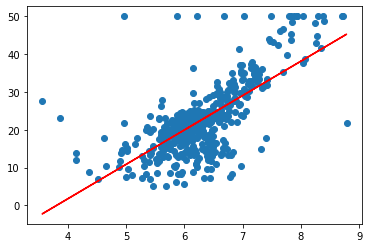

In [11]:
#Price vs Avg Number of Rooms
plt.plot(boston_df.RM, boston_df.Price, 'o')

x=boston_df.RM
plt.plot(x, m*x + b, 'r', label='Best Fit Line')

In [12]:
#RMSE = measure of how spread out these residuals are
#error value = sum of square residual value

result = np.linalg.lstsq(A,Y, rcond=None)

error_value = result[1]

rsme = np.sqrt(error_value/len(A))

print('Root Mean Square Error = %.2f' %rsme)

Root Mean Square Error = 6.60


In [13]:
#R^2 = indicates the percentage of the variance in the dependent variable that the independent variables explain collectively

In [14]:
import sklearn
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

In [15]:
#Set independent and dependent variabel for model

X_multi = boston_df.drop('Price', axis=1)

Y_target = boston_df['Price']

In [16]:
lreg.fit(X_multi, Y_target)

print('Intercept of model = %.2f' %lreg.intercept_)
print('Number of Coefficient = %.2f' %len(lreg.coef_))
print(lreg.coef_)

Intercept of model = 36.46
Number of Coefficient = 13.00
[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [17]:
#Assign the coefficient into a dataframe

coef_df = pd.DataFrame(boston_df.columns)

coef_df.columns = ['Features']

coef_df['Coefficient'] =pd.Series(lreg.coef_)

coef_df.drop([13], axis=0, inplace=True)

coef_df

,Features,Coefficient
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [38]:
#Split the data
K = np.vstack(boston_df.RM)

K_train, K_test, Y_train, Y_test = sklearn.model_selection.train_test_split(K, boston_df.Price)

#Fit the data
lreg = LinearRegression()

lreg.fit(K_train, Y_train)

print(lreg.coef_)
print(lreg.intercept_)


[9.0308208]
-34.38600986349377


In [42]:
#Predict the data
predict_train = lreg.predict(K_train)
predict_test = lreg.predict(K_test)

#The Score of Prediction
print(lreg.score(K_train, Y_train))
print(lreg.score(K_test, Y_test))

0.45895743676090206
0.5427059151326241


In [46]:
#RSME
rsme_train = np.sqrt(((Y_train - predict_train)**2).mean())
rsme_test = np.sqrt(((Y_test - predict_test)**2).mean())

print(rsme_train)
print(rsme_test)

6.603609416371817
6.610273285091607


Text(0.5, 1.0, 'Residual_Plot')

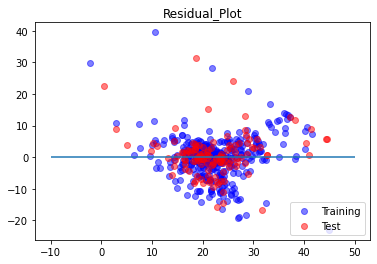

In [56]:
#Residual Plots

train =plt.scatter(predict_train, (Y_train - predict_train), c='b', alpha=0.5)

test = plt.scatter(predict_test, (Y_test - predict_test), c='r', alpha=0.5)

plt.hlines(y=0, xmin=-10, xmax=50)

plt.legend(['Training', 'Test'], loc='lower right')

plt.title('Residual_Plot')
